In [48]:
import os
import numpy as np
import pickle as pkl
import pandas as pd
import pickle
from collections import defaultdict
import sys
sys.path.append('/home/ak/Documents/Research/PaperCode/stylised_facts')
import lob_for_futures as lob
figures_destination = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
####
def symbol_file_name_path(symbol, file_idx):
    symbolPath = os.path.join(experimentsDestination, str(symbol))
    file_names =sorted(os.listdir(symbolPath))
    file_name =file_names[file_idx]
    file_path =os.path.join(symbolPath, file_name)
    return file_names, file_path
def n_F(dicts, bar):
    df = pd.DataFrame.from_dict(dicts[str(bar)])
    n = df.index.values
    F = df.median(axis=1).values
    return n, F
def h_params(h_dict, bar):
    h_df = pd.DataFrame.from_dict(h_dict[str(bar)]).T.median(axis=0)
    H_intercept = h_df[1]
    H = h_df[0]
    return H_intercept, H


def open_pickle_filepath(pickle_file):
    pickle_to_file = pickle.load(open(pickle_file, "rb"), encoding='latin1')

    return pickle_to_file


def returns(s):

    # compute log returns
    arr = np.diff(np.log(s))

    return (pd.Series(arr, index=s.index[1:]))

In [6]:
elements = '/media/ak/Elements/OrderBookProcessedData'
symbols = sorted(os.listdir(elements))

In [42]:
symbolIdx = 1
symbolFolder = os.path.join(elements, symbols[symbolIdx])
files = sorted(os.listdir(symbolFolder))
bars =['volume_bar', 'calendar_bar', 'usd_volume_bar', 'tick_bar']
symbol = symbols[symbolIdx]

In [11]:
fileIdx = 0
SymbolFileIdxPath = os.path.join(symbolFolder, files[fileIdx])
symbolFileDict = open_pickle_filepath(SymbolFileIdxPath)

In [29]:
symbolFileDict.keys()

dict_keys(['volume_bar', 'calendar_bar', 'usd_volume_bar', 'tick_bar', 'tick_bars'])

In [24]:
barCh = bars[0]
date = list(symbolFileDict[barCh].keys())[0]

In [30]:
df = symbolFileDict[barCh][date]
tick_bar_df = symbolFileDict['tick_bar'][date]
volume_bar_df = symbolFileDict['volume_bar'][date]
usd_volume_bar_df = symbolFileDict['usd_volume_bar'][date]
calendar_bar_df = symbolFileDict['calendar_bar'][date]

In [35]:
bar_returns = dict()
bars_dicts = defaultdict(dict)

vr = returns(volume_bar_df.micro_price_close).replace([np.inf, -np.inf], 0)  # volume
tr = returns(tick_bar_df.micro_price_close).replace([np.inf, -np.inf], 0)  # tick
dr = returns(usd_volume_bar_df.micro_price_close).dropna().replace([np.inf, -np.inf], 0)  # usd volume
df_ret = returns(calendar_bar_df.micro_price_close).dropna().replace([np.inf, -np.inf], 0)  # calendar
bar_returns[date] = {'tick': tr,
                     'volume': vr,
                     'dollar': dr,
                     'calendar': df_ret}
bars_dicts[date]['tick'] = tick_bar_df
bars_dicts[date]['volume'] = volume_bar_df
bars_dicts[date]['calendar'] = calendar_bar_df
bars_dicts[date]['dollar'] =  usd_volume_bar_df
      

In [36]:
from scipy.stats import jarque_bera
jb_value_tick, _ = jarque_bera(tr)
jb_value_vol, _ = jarque_bera(vr)
jb_value_dollar, _ = jarque_bera(dr)

jb_test_df = pd.DataFrame(data={'jarque_bera_results' : [jb_value_tick,  
                                                         jb_value_vol,
                                                         jb_value_dollar]
                               },
                          index=['tick', 'vol', 'dollar'])
jb_test_df

,jarque_bera_results
tick,12.475908
vol,129.841430
dollar,635054.547473


In [37]:
tick_standard = (tr - tr.mean()) / tr.std()
volume_standard = (vr - vr.mean()) / vr.std()
dollar_standard = (dr - dr.mean()) / dr.std()

/home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


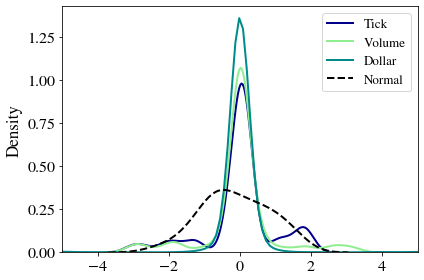

In [45]:
import seaborn as sns
fig, ax = plt.subplots()
#sns.kdeplot(time_standard, label="Time", bw=0.30, color='darkred')
sns.kdeplot(tick_standard, 
            ax=ax,
            label="Tick", 
            bw=0.25,
            color='darkblue')
sns.kdeplot(volume_standard,
            ax=ax,
            label="Volume",
            bw=0.25,
            color='lightgreen')
sns.kdeplot(dollar_standard,
            ax=ax,
            label="Dollar",
            bw=0.25,
            linewidth=2,
            color='darkcyan')
sns.kdeplot(np.random.normal(size=len(tick_standard)),
            ax=ax,
            label="Normal",
            color='black',
            linewidth=2,
            linestyle="--")
plt.legend()
# _=ax.set_xticks(range(-5, 6))
_=ax.set_xlim(-5, 5)
file_name = str(symbol)+'_multiclocks_density_plot.png'
plt.savefig(os.path.join(figures_destination,file_name))

In [46]:
## kind of need to do this while i get medians across multiple dates and time horizons

In [49]:
arrival_rates = lob.volatilityEstimation(df).arrival_rates()

KeyError: 'timestamp_open'